In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
import warnings
warnings.filterwarnings('ignore')
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import statistics

In [2]:
redWine = pd.read_csv("winequality-red.csv")

In [3]:
redWine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
maternalHealth = pd.read_csv("Maternal Health Risk Data Set.csv") 

In [5]:
riskLevels = []

for i in range(len(maternalHealth)):
    if maternalHealth.iloc[i,6] == "low risk":
        riskLevels.append(0)
    elif maternalHealth.iloc[i,6] == "mid risk":
        riskLevels.append(1)
    else:
        riskLevels.append(2)
        
risks = pd.Series(riskLevels)
maternalHealth['Risk'] = risks.values
maternalHealth

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Risk
0,25,130,80,15.0,98.0,86,high risk,2
1,35,140,90,13.0,98.0,70,high risk,2
2,29,90,70,8.0,100.0,80,high risk,2
3,30,140,85,7.0,98.0,70,high risk,2
4,35,120,60,6.1,98.0,76,low risk,0
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,2
1010,55,120,90,18.0,98.0,60,high risk,2
1011,35,85,60,19.0,98.0,86,high risk,2
1012,43,120,90,18.0,98.0,70,high risk,2


In [6]:
########### K-Means ###########

In [7]:
# Red wine dataset k-means

In [8]:
scaler = StandardScaler()
scaled_featuresRW = scaler.fit_transform(redWine)

In [9]:
#SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# and https://realpython.com/k-means-clustering-python/
kmeansRW_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sseRW = []
times = []
for k in range(1, 20):
    start = time.time()
    kmeansRW = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW.fit(scaled_featuresRW)   
    end = time.time()
    times.append(end-start)
    sseRW.append(kmeansRW.inertia_)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.061354599500957285


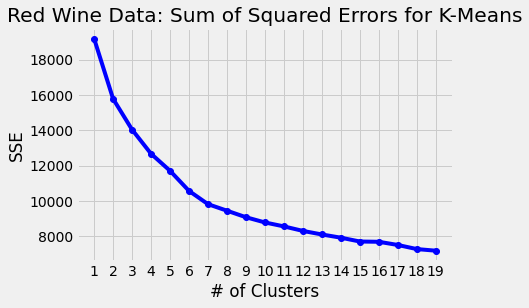

In [10]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sseRW, 'bo-')
plt.xticks(range(1, 20))
plt.xlabel("# of Clusters")
plt.ylabel("SSE")
plt.title("Red Wine Data: Sum of Squared Errors for K-Means")
plt.show()

In [11]:
kl = KneeLocator(
    range(1, 20), sseRW, curve="convex", direction="decreasing"
)

kl.elbow

7

In [12]:
# A list holds the silhouette coefficients for each k
silhouette_coefficientsRW = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansRW = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW.fit(scaled_featuresRW)
    score = silhouette_score(scaled_featuresRW, kmeansRW.labels_)
    silhouette_coefficientsRW.append(score)

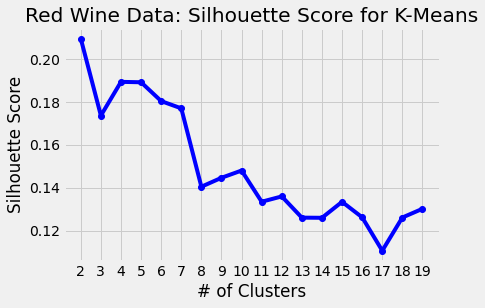

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficientsRW, 'bo-')
plt.xticks(range(2, 20))
plt.xlabel("# of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Red Wine Data: Silhouette Score for K-Means")
plt.show()

In [14]:
# Maternal health dataset k-means

In [15]:
maternalHealthScaled = maternalHealth.drop(columns=['RiskLevel'])

In [16]:
scaler = StandardScaler()
scaled_featuresMH = scaler.fit_transform(maternalHealthScaled)

In [17]:
#SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# and https://realpython.com/k-means-clustering-python/
kmeansMH_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sseMH = []
times=[]
for k in range(1, 20):
    start = time.time()
    kmeansMH = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH.fit(scaled_featuresMH)
    end = time.time()
    times.append(end-start)
    sseMH.append(kmeansMH.inertia_)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.030586631674515575


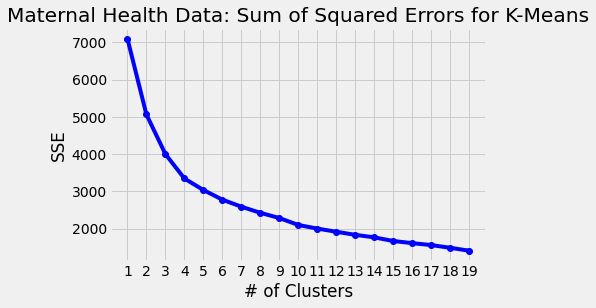

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sseMH, 'bo-')
plt.xticks(range(1, 20))
plt.xlabel("# of Clusters")
plt.ylabel("SSE")
plt.title("Maternal Health Data: Sum of Squared Errors for K-Means")
plt.show()

In [19]:
kl = KneeLocator(
    range(1, 20), sseMH, curve="convex", direction="decreasing"
)

kl.elbow

4

In [20]:
# A list holds the silhouette coefficients for each k
silhouette_coefficientsMH = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansMH = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH.fit(scaled_featuresMH)
    score = silhouette_score(scaled_featuresMH, kmeansMH.labels_)
    silhouette_coefficientsMH.append(score)

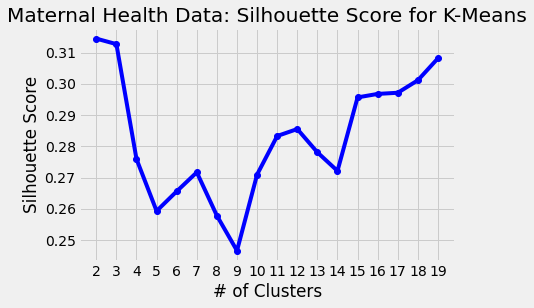

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficientsMH, 'bo-')
plt.xticks(range(2, 20))
plt.xlabel("# of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Maternal Health Data: Silhouette Score for K-Means")
plt.show()

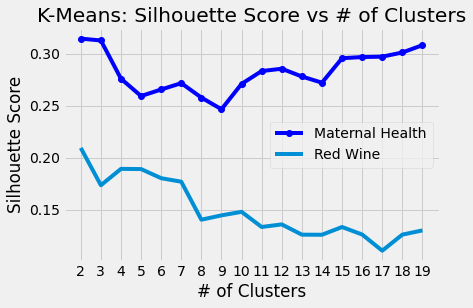

In [22]:
plt.plot(range(2, 20), silhouette_coefficientsMH, 'bo-', label = 'Maternal Health')
plt.plot(range(2, 20), silhouette_coefficientsRW, label = 'Red Wine')
plt.xlabel('# of Clusters')
plt.xticks(range(2, 20))
plt.ylabel('Silhouette Score')
plt.title('K-Means: Silhouette Score vs # of Clusters')
plt.legend()
plt.show()

In [23]:
########### EM ###########

In [24]:
# Red wine dataset EM

In [25]:
#SOURCE: https://scikit-learn.org/stable/modules/mixture.html#mixture
#  and https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
# and https://towardsdatascience.com/gmm-gaussian-mixture-models-how-to-successfully-use-it-to-cluster-your-data-891dc8ac058f

silRW=[]
times=[]
for k in range(2, 20):
    start = time.time()
    gm_RW = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_RW.fit_predict(scaled_featuresRW)
    end = time.time()
    times.append(end-start)
    silRW.append(metrics.silhouette_score(scaled_featuresRW, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.7678722275627984


In [26]:
#Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
#     for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
#         draw_ellipse(pos, covar, alpha=w * w_factor)

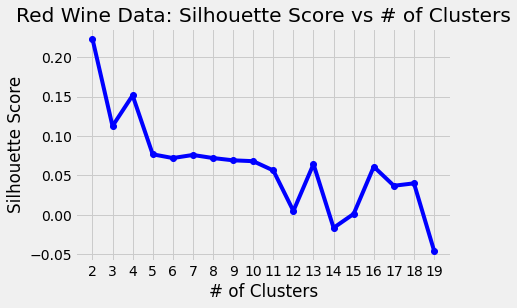

In [27]:
# Plot the resulting Silhouette scores on a graph
# plt.figure(figsize=(16,8), dpi=300)
plt.plot(range(2, 20), silRW, 'bo-')
plt.xlabel('# of Clusters')
plt.xticks(range(2, 20))
plt.ylabel('Silhouette Score')
plt.title('Red Wine Data: Silhouette Score vs # of Clusters')
plt.show()

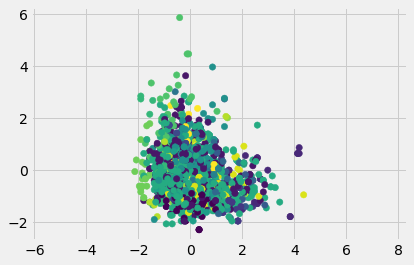

In [28]:
plot_gmm(gm_RW, scaled_featuresRW)

In [29]:
# Maternal health dataset EM

In [30]:
#SOURCE: https://scikit-learn.org/stable/modules/mixture.html#mixture
#  and https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
silMH = []
times=[]
for k in range(2, 20):
    start = time.time()

    gm_MH = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_MH.fit_predict(scaled_featuresMH)
    end = time.time()
    times.append(end-start)
    silMH.append(metrics.silhouette_score(scaled_featuresMH, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.18105705579121908


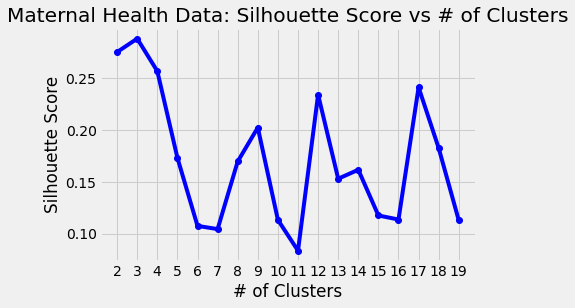

In [31]:
# Plot the resulting Silhouette scores on a graph
# plt.figure(figsize=(16,8), dpi=300)
plt.plot(range(2, 20), silMH, 'bo-')
plt.xlabel('# of Clusters')
plt.xticks(range(2, 20))
plt.ylabel('Silhouette Score')
plt.title('Maternal Health Data: Silhouette Score vs # of Clusters')
plt.show()

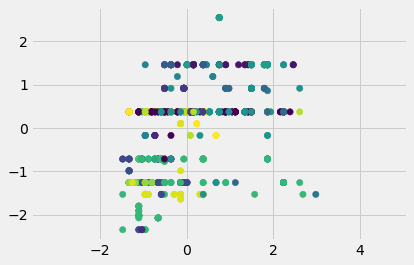

In [32]:
plot_gmm(gm_MH, scaled_featuresMH)

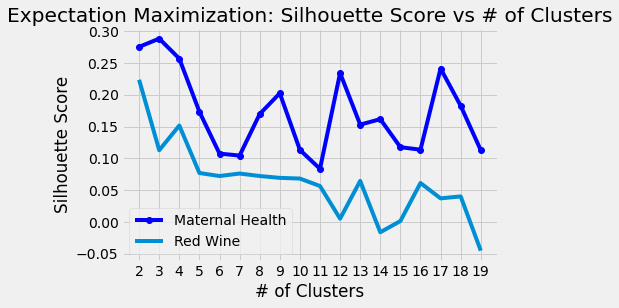

In [33]:
# Plot the resulting Silhouette scores on a graph
# plt.figure(figsize=(16,8), dpi=300)
plt.plot(range(2, 20), silMH, 'bo-', label = 'Maternal Health')
plt.plot(range(2, 20), silRW, label = 'Red Wine')
plt.xlabel('# of Clusters')
plt.xticks(range(2, 20))
plt.ylabel('Silhouette Score')
plt.title('Expectation Maximization: Silhouette Score vs # of Clusters')
plt.legend()
plt.show()

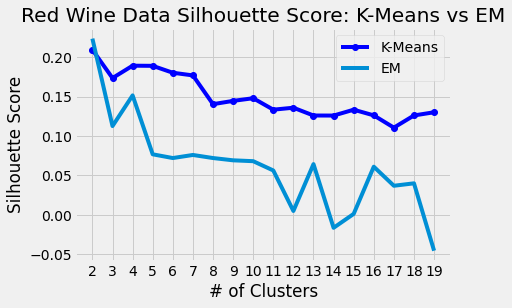

In [34]:
plt.plot(range(2, 20), silhouette_coefficientsRW, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silRW, label = 'EM')
plt.xlabel('# of Clusters')
plt.xticks(range(2, 20))
plt.ylabel('Silhouette Score')
plt.title('Red Wine Data Silhouette Score: K-Means vs EM')
plt.legend()
plt.show()


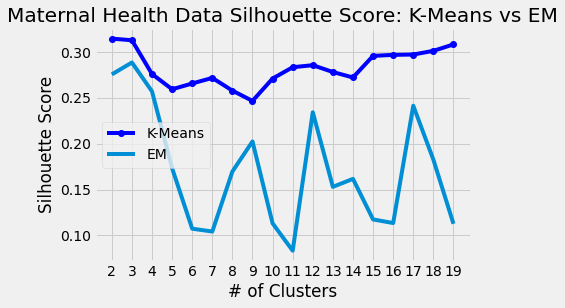

In [35]:
plt.plot(range(2, 20), silhouette_coefficientsMH, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silMH, label = 'EM')
plt.xlabel('# of Clusters')
plt.xticks(range(2, 20))
plt.ylabel('Silhouette Score')
plt.title('Maternal Health Data Silhouette Score: K-Means vs EM')
plt.legend()
plt.show()

In [36]:
########### PCA ###########

In [37]:
# Red wine PCA
#Source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [38]:
start = time.time()
pcaRW = PCA(n_components=1)
principalComponents = pcaRW.fit_transform(scaled_featuresRW)
end = time.time()
print('Wall clock time: ', end-start)

Wall clock time:  0.0075070858001708984


In [39]:
principalDfRW = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [40]:
principalDfRW

,principal component 1
0,-1.779442
1,-1.004185
2,-0.915783
3,2.404077
4,-1.779442
...,...
1594,-2.241991
1595,-2.122456
1596,-1.366265
1597,-2.367147


In [41]:
# Red wine K-Means with PCA

In [42]:
#SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# and https://realpython.com/k-means-clustering-python/
kmeansRW_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sseRW_PCA = []
times = []
for k in range(1, 20):
    start = time.time()
    kmeansRW_PCA = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_PCA.fit(principalDfRW)
    end = time.time()
    sseRW_PCA.append(kmeansRW_PCA.inertia_)
    times.append(end-start)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.05817847502859015


In [43]:
kl = KneeLocator(
    range(1, 20), sseRW_PCA, curve="convex", direction="decreasing"
)

kl.elbow

4

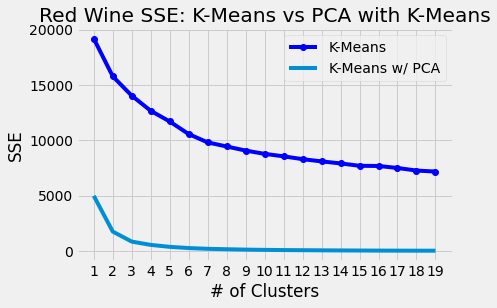

In [44]:
plt.plot(range(1, 20), sseRW, 'bo-', label = 'K-Means')
plt.plot(range(1, 20), sseRW_PCA, label = 'K-Means w/ PCA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Red Wine SSE: K-Means vs PCA with K-Means')
plt.legend()
plt.show()

In [45]:
# A list holds the silhouette coefficients for each k
silhouette_coefficientsRW_PCA = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansRW_PCA = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_PCA.fit(principalDfRW)
    score = silhouette_score(principalDfRW, kmeansRW_PCA.labels_)
    silhouette_coefficientsRW_PCA.append(score)

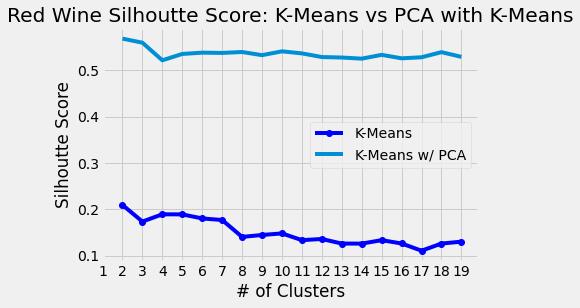

In [46]:
plt.plot(range(2, 20), silhouette_coefficientsRW, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silhouette_coefficientsRW_PCA, label = 'K-Means w/ PCA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score: K-Means vs PCA with K-Means')
plt.legend()
plt.show()

In [47]:
# Red wine EM with PCA

In [48]:
silRW_PCA=[]
times=[]
for k in range(2, 20):
    start = time.time()

    gm_RW_PCA = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_RW_PCA.fit_predict(principalDfRW)
    end = time.time()
    times.append(end-start)
    silRW_PCA.append(metrics.silhouette_score(principalDfRW, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.054345912403530545


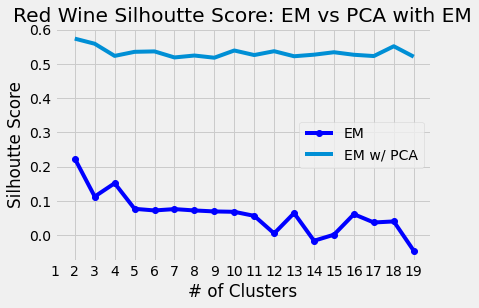

In [49]:
plt.plot(range(2, 20), silRW, 'bo-', label = 'EM')
plt.plot(range(2, 20), silRW_PCA, label = 'EM w/ PCA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score: EM vs PCA with EM')
plt.legend()
plt.show()

In [50]:
# Maternal health PCA
#Source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [51]:
start = time.time()
pcaMH = PCA(n_components=1)
principalComponents = pcaMH.fit_transform(scaled_featuresMH)
end = time.time()
print('Wall clock time: ', end-start)

Wall clock time:  0.011172294616699219


In [52]:
principalDfMH = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [53]:
# Maternal Health K-Means with PCA

In [54]:
#SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# and https://realpython.com/k-means-clustering-python/
kmeansMH_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sseMH_PCA = []
times = []
for k in range(1, 20):
    start = time.time()
    kmeansMH_PCA = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_PCA.fit(principalDfMH)
    end = time.time()
    times.append(end-start)
    sseMH_PCA.append(kmeansMH_PCA.inertia_)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.03447638059917249


In [55]:
kl = KneeLocator(
    range(1, 20), sseMH_PCA, curve="convex", direction="decreasing"
)

kl.elbow

4

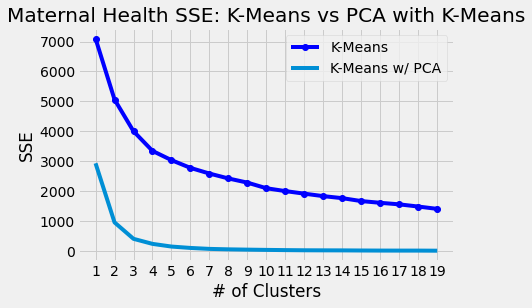

In [56]:
plt.plot(range(1, 20), sseMH, 'bo-', label = 'K-Means')
plt.plot(range(1, 20), sseMH_PCA, label = 'K-Means w/ PCA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Maternal Health SSE: K-Means vs PCA with K-Means')
plt.legend()
plt.show()

In [57]:
# A list holds the silhouette coefficients for each k
silhouette_coefficientsMH_PCA = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansMH_PCA = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_PCA.fit(principalDfMH)
    score = silhouette_score(principalDfMH, kmeansMH_PCA.labels_)
    silhouette_coefficientsMH_PCA.append(score)

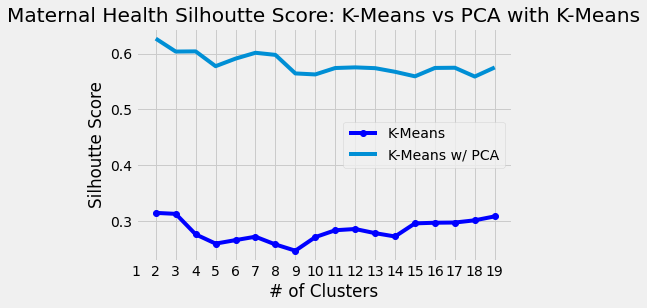

In [58]:
plt.plot(range(2, 20), silhouette_coefficientsMH, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silhouette_coefficientsMH_PCA, label = 'K-Means w/ PCA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score: K-Means vs PCA with K-Means')
plt.legend()
plt.show()

In [59]:
# Maternal health EM with PCA

In [198]:
silMH_PCA=[]
times=[]
for k in range(2, 20):
    start = time.time()
    gm_MH_PCA = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_MH_PCA.fit_predict(principalDfMH)
    end = time.time()
    times.append(end-start)
    silMH_PCA.append(metrics.silhouette_score(principalDfMH, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.07000784079233806


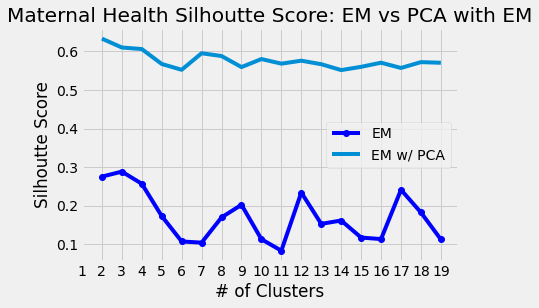

In [199]:
plt.plot(range(2, 20), silMH, 'bo-', label = 'EM')
plt.plot(range(2, 20), silMH_PCA, label = 'EM w/ PCA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score: EM vs PCA with EM')
plt.legend()
plt.show()

In [64]:
########### ICA ###########
# Source: https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/decomposition/plot_ica_blind_source_separation.html
#  and https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

In [65]:
# Red wine ICA

In [66]:
start = time.time()
ICA_RW = FastICA()
S_RW = ICA_RW.fit(scaled_featuresRW).transform(scaled_featuresRW) 
end = time.time()
print('Wall clock time: ', end-start)

Wall clock time:  0.12727856636047363


In [67]:
# Red wine K-Means with ICA

In [68]:
kmeansRW_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sseRW_ICA = []
times=[]
for k in range(1, 20):
    start = time.time()

    kmeansRW_ICA = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_ICA.fit(S_RW)
    end = time.time()
    times.append(end-start)
    sseRW_ICA.append(kmeansRW_ICA.inertia_)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.059980342262669614


In [69]:
#different values for 'fun' = ‘logcosh’(default), ‘exp’, ‘cube’
ICA_RW1 = FastICA(fun = 'exp')
S_RW1 = ICA_RW1.fit(scaled_featuresRW).transform(scaled_featuresRW)
sseRW_ICA1 = []
for k in range(1, 20):
    kmeansRW_ICA1 = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_ICA1.fit(S_RW1)
    sseRW_ICA1.append(kmeansRW_ICA1.inertia_)
    
    
ICA_RW2 = FastICA(fun = 'cube')
S_RW2 = ICA_RW2.fit(scaled_featuresRW).transform(scaled_featuresRW)
sseRW_ICA2 = []
for k in range(1, 20):
    kmeansRW_ICA2 = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_ICA2.fit(S_RW2)
    sseRW_ICA2.append(kmeansRW_ICA2.inertia_)

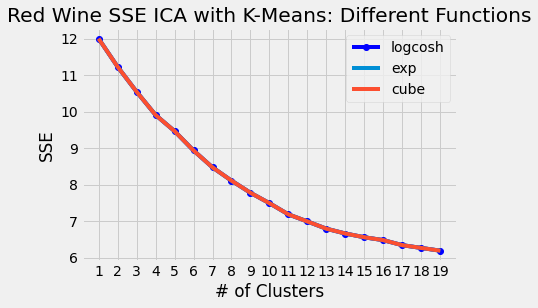

In [70]:
plt.plot(range(1, 20), sseRW_ICA, 'bo-', label = 'logcosh')
plt.plot(range(1, 20), sseRW_ICA1, label = 'exp')
plt.plot(range(1, 20), sseRW_ICA2, label = 'cube')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Red Wine SSE ICA with K-Means: Different Functions')
plt.legend()
plt.show()

In [71]:
kl = KneeLocator(
    range(1, 20), sseRW_ICA1, curve="convex", direction="decreasing"
)

kl.elbow

9

In [72]:
#different values for 'whiten' = ‘‘arbitrary-variance’ (default), ‘unit-variance’, False
ICA_RW1 = FastICA(whiten='unit-variance')
S_RW1 = ICA_RW1.fit(scaled_featuresRW).transform(scaled_featuresRW)
sseRW_ICA1 = []
for k in range(1, 20):
    kmeansRW_ICA1 = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_ICA1.fit(S_RW1)
    sseRW_ICA1.append(kmeansRW_ICA1.inertia_)
    
    
ICA_RW2 = FastICA(whiten=False)
S_RW2 = ICA_RW2.fit(scaled_featuresRW).transform(scaled_featuresRW)
sseRW_ICA2 = []
for k in range(1, 20):
    kmeansRW_ICA2 = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_ICA2.fit(S_RW2)
    sseRW_ICA2.append(kmeansRW_ICA2.inertia_)

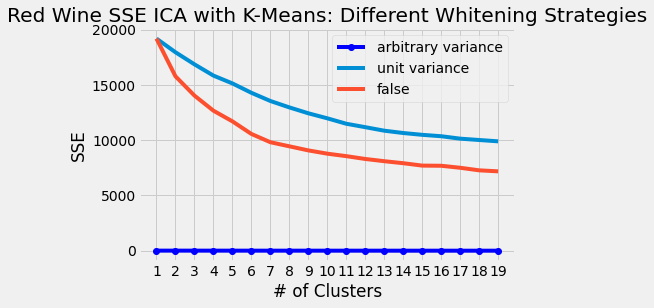

In [73]:
plt.plot(range(1, 20), sseRW_ICA, 'bo-', label = 'arbitrary variance')
plt.plot(range(1, 20), sseRW_ICA1, label = 'unit variance')
plt.plot(range(1, 20), sseRW_ICA2, label = 'false')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Red Wine SSE ICA with K-Means: Different Whitening Strategies')
plt.legend()
plt.show()

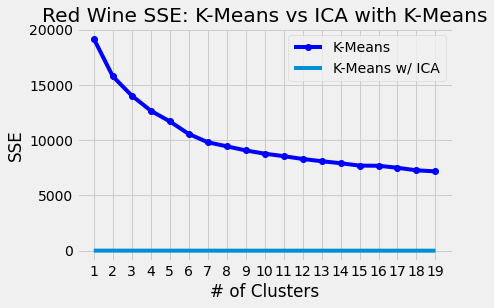

In [74]:
#here we choose the best performance: fun = logcosh (default) and whiten = arbitrary variance (default)
plt.plot(range(1, 20), sseRW, 'bo-', label = 'K-Means')
plt.plot(range(1, 20), sseRW_ICA, label = 'K-Means w/ ICA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Red Wine SSE: K-Means vs ICA with K-Means')
plt.legend()
plt.show()

In [75]:
silhouette_coefficientsRW_ICA = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansRW_ICA = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_ICA.fit(S_RW)
    score = silhouette_score(S_RW, kmeansRW_ICA.labels_)
    silhouette_coefficientsRW_ICA.append(score)

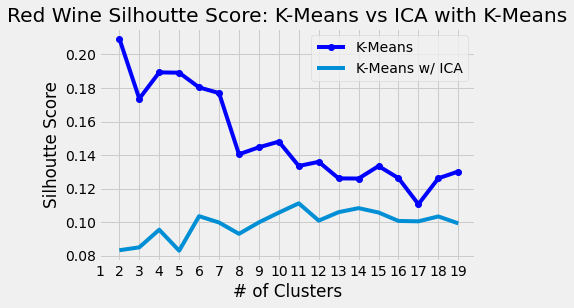

In [76]:
plt.plot(range(2, 20), silhouette_coefficientsRW, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silhouette_coefficientsRW_ICA, label = 'K-Means w/ ICA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score: K-Means vs ICA with K-Means')
plt.legend()
plt.show()

In [77]:
# Red wine EM with ICA

In [78]:
silRW_ICA= []
times = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 20):
    start = time.time()
    gm_RW_ICA = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_RW_ICA.fit_predict(S_RW)
    end = time.time()
    times.append(end-start)
    silRW_ICA.append(metrics.silhouette_score(S_RW, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))
    

Wall clock time:  0.6479385561413236


In [79]:
#different values for 'fun' = ‘logcosh’(default), ‘exp’, ‘cube’
ICA_RW1 = FastICA(fun = 'exp')
S_RW1 = ICA_RW1.fit(scaled_featuresRW).transform(scaled_featuresRW)
silRW_ICA1=[]
for k in range(2, 20):
    gm_RW_ICA1 = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_RW_ICA1.fit_predict(S_RW1)
    silRW_ICA1.append(metrics.silhouette_score(S_RW1, labels, metric='euclidean'))
    
ICA_RW2 = FastICA(fun = 'cube')
S_RW2 = ICA_RW2.fit(scaled_featuresRW).transform(scaled_featuresRW)
silRW_ICA2=[]
for k in range(2, 20):
    gm_RW_ICA2 = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_RW_ICA2.fit_predict(S_RW2)
    silRW_ICA2.append(metrics.silhouette_score(S_RW2, labels, metric='euclidean'))   

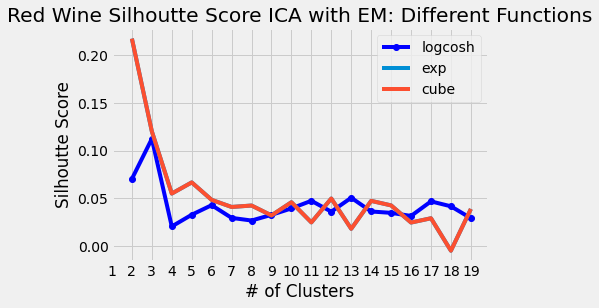

In [80]:
plt.plot(range(2, 20), silRW_ICA, 'bo-', label = 'logcosh')
plt.plot(range(2, 20), silRW_ICA1, label = 'exp')
plt.plot(range(2, 20), silRW_ICA1, label = 'cube')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score ICA with EM: Different Functions')
plt.legend()
plt.show()

In [81]:
#different values for 'whiten' = ‘‘arbitrary-variance’ (default), ‘unit-variance’, False
ICA_RW1 = FastICA(whiten='unit-variance')
S_RW1 = ICA_RW1.fit(scaled_featuresRW).transform(scaled_featuresRW)
silRW_ICA1=[]
for k in range(2, 20):
    gm_RW_ICA1 = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_RW_ICA1.fit_predict(S_RW1)
    silRW_ICA1.append(metrics.silhouette_score(S_RW1, labels, metric='euclidean'))
    
ICA_RW2 = FastICA(whiten = False)
S_RW2 = ICA_RW2.fit(scaled_featuresRW).transform(scaled_featuresRW)
silRW_ICA2=[]
for k in range(2, 20):
    gm_RW_ICA2 = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_RW_ICA2.fit_predict(S_RW2)
    silRW_ICA2.append(metrics.silhouette_score(S_RW2, labels, metric='euclidean'))   

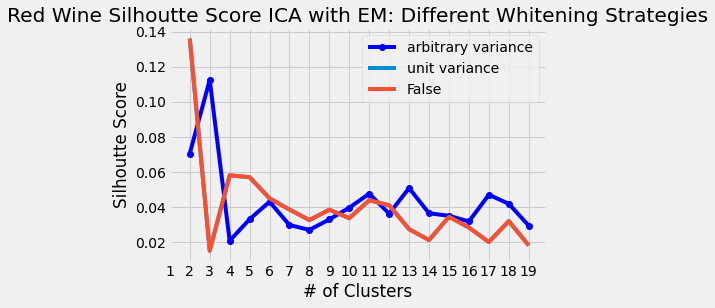

In [82]:
plt.plot(range(2, 20), silRW_ICA, 'bo-', label = 'arbitrary variance')
plt.plot(range(2, 20), silRW_ICA1,  label = 'unit variance')
plt.plot(range(2, 20), silRW_ICA1, label = False)
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score ICA with EM: Different Whitening Strategies')
plt.legend()
plt.show()

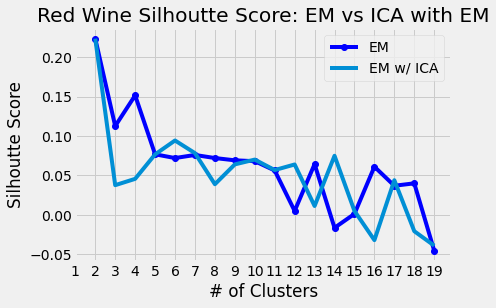

In [83]:
#here we choose the best performance: fun = logcosh and whiten = false
plt.plot(range(2, 20), silRW, 'bo-', label = 'EM')
plt.plot(range(2, 20), silRW_ICA2, label = 'EM w/ ICA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score: EM vs ICA with EM')
plt.legend()
plt.show()

In [84]:
# Maternal Health ICA
# Source: https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/decomposition/plot_ica_blind_source_separation.html
#  and https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

In [85]:
start = time.time()
ICA_MH = FastICA()
S_MH = ICA_MH.fit(scaled_featuresMH).transform(scaled_featuresMH) 
end = time.time()
print('Wall clock time: ', end-start)

Wall clock time:  0.03321981430053711


In [86]:
# Maternal Health K-Means with ICA

In [87]:
kmeansMH_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sseMH_ICA = []
times=[]
for k in range(1, 20):
    start = time.time()
    kmeansMH_ICA = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_ICA.fit(S_MH)
    end = time.time()
    times.append(end-start)
    sseMH_ICA.append(kmeansMH_ICA.inertia_)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.035756587982177734


In [88]:
#different values for 'fun' = ‘logcosh’(default), ‘exp’, ‘cube’
ICA_MH1 = FastICA(fun = 'exp')
S_MH1 = ICA_MH1.fit(scaled_featuresMH).transform(scaled_featuresMH)
sseMH_ICA1 = []
for k in range(1, 20):
    kmeansMH_ICA1 = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_ICA1.fit(S_MH1)
    sseMH_ICA1.append(kmeansMH_ICA1.inertia_)
    
    
ICA_MH2 = FastICA(fun = 'cube')
S_MH2 = ICA_MH2.fit(scaled_featuresMH).transform(scaled_featuresMH)
sseMH_ICA2 = []
for k in range(1, 20):
    kmeansMH_ICA2 = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_ICA2.fit(S_MH2)
    sseMH_ICA2.append(kmeansMH_ICA2.inertia_)

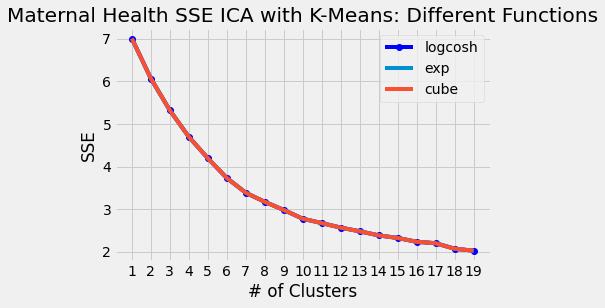

In [89]:
plt.plot(range(1, 20), sseMH_ICA, 'bo-', label = 'logcosh')
plt.plot(range(1, 20), sseMH_ICA1, label = 'exp')
plt.plot(range(1, 20), sseMH_ICA2, label = 'cube')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Maternal Health SSE ICA with K-Means: Different Functions')
plt.legend()
plt.show()

In [90]:
kl = KneeLocator(
    range(1, 20), sseMH_ICA1, curve="convex", direction="decreasing"
)

kl.elbow

7

In [91]:
#different values for 'whiten' = ‘‘arbitrary-variance’ (default), ‘unit-variance’, False
ICA_MH1 = FastICA(whiten='unit-variance')
S_MH1 = ICA_MH1.fit(scaled_featuresMH).transform(scaled_featuresMH)
sseMH_ICA1 = []
for k in range(1, 20):
    kmeansMH_ICA1 = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_ICA1.fit(S_MH1)
    sseMH_ICA1.append(kmeansMH_ICA1.inertia_)
    
    
ICA_MH2 = FastICA(whiten=False)
S_MH2 = ICA_MH2.fit(scaled_featuresMH).transform(scaled_featuresMH)
sseMH_ICA2 = []
for k in range(1, 20):
    kmeansMH_ICA2 = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_ICA2.fit(S_MH2)
    sseMH_ICA2.append(kmeansMH_ICA2.inertia_)

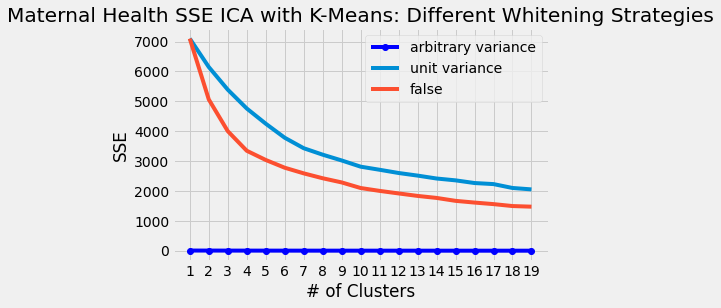

In [92]:
plt.plot(range(1, 20), sseMH_ICA, 'bo-', label = 'arbitrary variance')
plt.plot(range(1, 20), sseMH_ICA1, label = 'unit variance')
plt.plot(range(1, 20), sseMH_ICA2, label = 'false')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Maternal Health SSE ICA with K-Means: Different Whitening Strategies')
plt.legend()
plt.show()

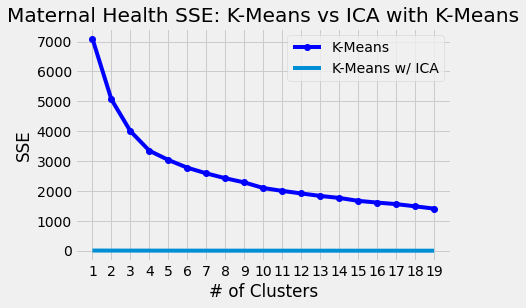

In [93]:
#here we choose the best performance: fun = logcosh (default) and whiten = arbitrary variance (default)
plt.plot(range(1, 20), sseMH, 'bo-', label = 'K-Means')
plt.plot(range(1, 20), sseMH_ICA, label = 'K-Means w/ ICA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Maternal Health SSE: K-Means vs ICA with K-Means')
plt.legend()
plt.show()

In [94]:
silhouette_coefficientsMH_ICA = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansMH_ICA = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_ICA.fit(S_MH)
    score = silhouette_score(S_MH, kmeansMH_ICA.labels_)
    silhouette_coefficientsMH_ICA.append(score)

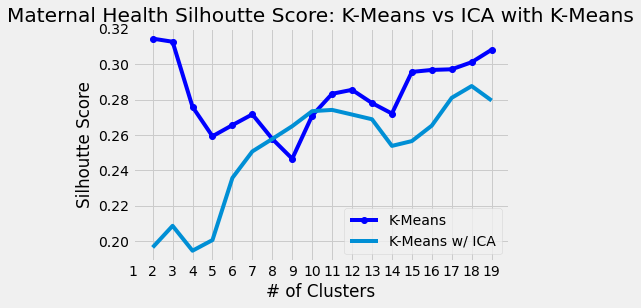

In [95]:
plt.plot(range(2, 20), silhouette_coefficientsMH, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silhouette_coefficientsMH_ICA, label = 'K-Means w/ ICA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score: K-Means vs ICA with K-Means')
plt.legend()
plt.show()

In [96]:
# Maternal health EM with ICA

In [97]:
silMH_ICA= []
times=[]
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 20):
    start = time.time()
    gm_MH_ICA = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_MH_ICA.fit_predict(S_MH)
    end = time.time()
    times.append(end-start)
    silMH_ICA.append(metrics.silhouette_score(S_MH, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.25849592685699463


In [98]:
#different values for 'fun' = ‘logcosh’(default), ‘exp’, ‘cube’
ICA_MH1 = FastICA(fun = 'exp')
S_MH1 = ICA_MH1.fit(scaled_featuresMH).transform(scaled_featuresMH)
silMH_ICA1=[]
for k in range(2, 20):
    gm_MH_ICA1 = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_MH_ICA1.fit_predict(S_MH1)
    silMH_ICA1.append(metrics.silhouette_score(S_MH1, labels, metric='euclidean'))
    
ICA_MH2 = FastICA(fun = 'cube')
S_MH2 = ICA_MH2.fit(scaled_featuresMH).transform(scaled_featuresMH)
silMH_ICA2=[]
for k in range(2, 20):
    gm_MH_ICA2 = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_MH_ICA2.fit_predict(S_MH2)
    silMH_ICA2.append(metrics.silhouette_score(S_MH2, labels, metric='euclidean'))   

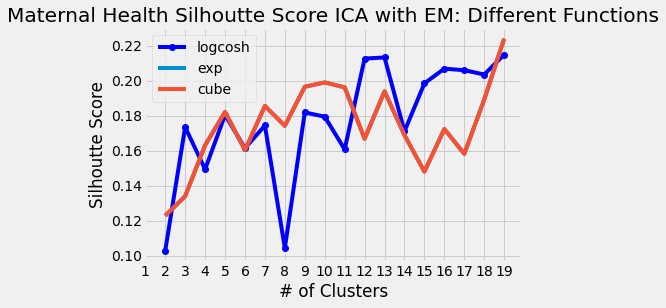

In [99]:
plt.plot(range(2, 20), silMH_ICA, 'bo-', label = 'logcosh')
plt.plot(range(2, 20), silMH_ICA1, label = 'exp')
plt.plot(range(2, 20), silMH_ICA1, label = 'cube')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score ICA with EM: Different Functions')
plt.legend()
plt.show()

In [100]:
#different values for 'whiten' = ‘‘arbitrary-variance’ (default), ‘unit-variance’, False
ICA_MH1 = FastICA(whiten='unit-variance')
S_MH1 = ICA_MH1.fit(scaled_featuresMH).transform(scaled_featuresMH)
silMH_ICA1=[]
for k in range(2, 20):
    gm_MH_ICA1 = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_MH_ICA1.fit_predict(S_MH1)
    silMH_ICA1.append(metrics.silhouette_score(S_MH1, labels, metric='euclidean'))
    
ICA_MH2 = FastICA(whiten = False)
S_MH2 = ICA_MH2.fit(scaled_featuresMH).transform(scaled_featuresMH)
silMH_ICA2=[]
for k in range(2, 20):
    gm_MH_ICA2 = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_MH_ICA2.fit_predict(S_MH2)
    silMH_ICA2.append(metrics.silhouette_score(S_MH2, labels, metric='euclidean'))   

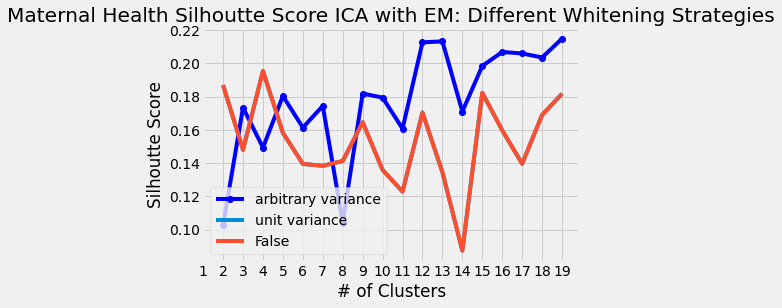

In [101]:
plt.plot(range(2, 20), silMH_ICA, 'bo-', label = 'arbitrary variance')
plt.plot(range(2, 20), silMH_ICA1,  label = 'unit variance')
plt.plot(range(2, 20), silMH_ICA1, label = False)
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score ICA with EM: Different Whitening Strategies')
plt.legend()
plt.show()

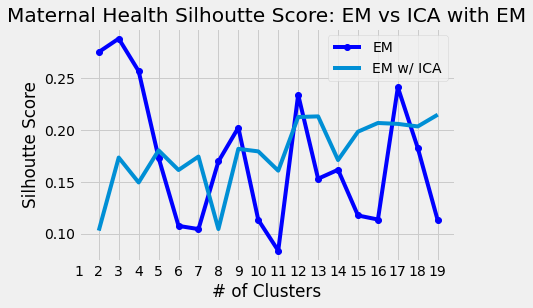

In [102]:
#here we choose the best performance: fun = logcosh and whiten = arbitrary variance
plt.plot(range(2, 20), silMH, 'bo-', label = 'EM')
plt.plot(range(2, 20), silMH_ICA, label = 'EM w/ ICA')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score: EM vs ICA with EM')
plt.legend()
plt.show()

In [103]:
########### Randomized Projections (RP) ###########
# Source: https://towardsdatascience.com/random-projection-in-python-705883a19e48

In [104]:
start=time.time()
projectorRW = GaussianRandomProjection(n_components=1)
X_RW = projectorRW.fit_transform(scaled_featuresRW)
end=time.time()
print('Wall clock time: ', end-start)

Wall clock time:  0.002781391143798828


In [105]:
# Red wine K-Means with RP

In [106]:
#SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# and https://realpython.com/k-means-clustering-python/
kmeansRW_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sseRW_RP = []
times=[]
for k in range(1, 20):
    start = time.time()
    kmeansRW_RP = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_RP.fit(X_RW)
    end = time.time()
    times.append(end-start)
    sseRW_RP.append(kmeansRW_RP.inertia_)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.06303838679665014


In [107]:
kl = KneeLocator(
    range(1, 20), sseRW_RP, curve="convex", direction="decreasing"
)

kl.elbow

5

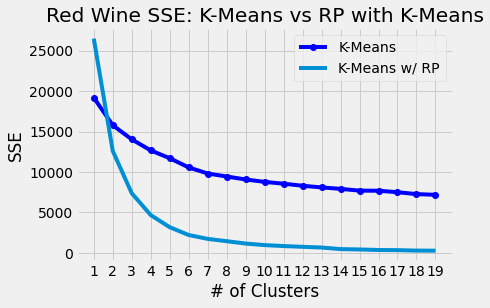

In [108]:
plt.plot(range(1, 20), sseRW, 'bo-', label = 'K-Means')
plt.plot(range(1, 20), sseRW_RP, label = 'K-Means w/ RP')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Red Wine SSE: K-Means vs RP with K-Means')
plt.legend()
plt.show()

In [109]:
# A list holds the silhouette coefficients for each k
silhouette_coefficientsRW_RP = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansRW_RP = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_RP.fit(X_RW)
    score = silhouette_score(X_RW, kmeansRW_RP.labels_)
    silhouette_coefficientsRW_RP.append(score)

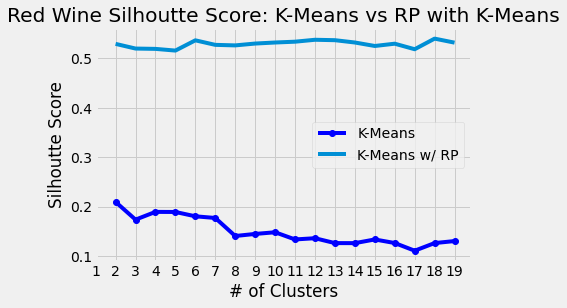

In [110]:
plt.plot(range(2, 20), silhouette_coefficientsRW, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silhouette_coefficientsRW_RP, label = 'K-Means w/ RP')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score: K-Means vs RP with K-Means')
plt.legend()
plt.show()

In [111]:
# Red wine EM with RP

In [112]:
silRW_RP=[]
times=[]
for k in range(2, 20):
    start = time.time()
    gm_RW_RP = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_RW_RP.fit_predict(X_RW)
    end = time.time()
    times.append(end-start)
    silRW_RP.append(metrics.silhouette_score(X_RW, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.055472983254326716


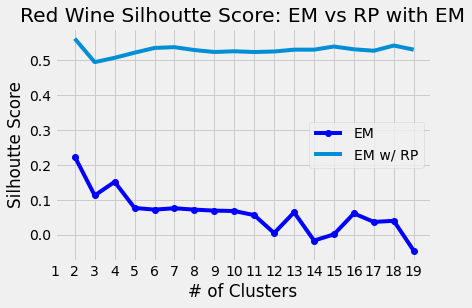

In [113]:
plt.plot(range(2, 20), silRW, 'bo-', label = 'EM')
plt.plot(range(2, 20), silRW_RP, label = 'EM w/ RP')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score: EM vs RP with EM')
plt.legend()
plt.show()

In [114]:
#Maternal health RP

In [115]:
start=time.time()
projectorMH = GaussianRandomProjection(n_components=1)
X_MH = projectorMH.fit_transform(scaled_featuresMH)
end=time.time()
print('Wall clock time: ', end-start)

Wall clock time:  0.0008292198181152344


In [116]:
# Maternal health K-Means with RP

In [117]:
#SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# and https://realpython.com/k-means-clustering-python/
kmeansMH_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sseMH_RP = []
times=[]
for k in range(1, 20):
    start = time.time()
    kmeansMH_RP = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_RP.fit(X_MH)
    end = time.time()
    times.append(end-start)
    sseMH_RP.append(kmeansMH_RP.inertia_)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.0313499601263749


In [118]:
kl = KneeLocator(
    range(1, 20), sseMH_RP, curve="convex", direction="decreasing"
)

kl.elbow

4

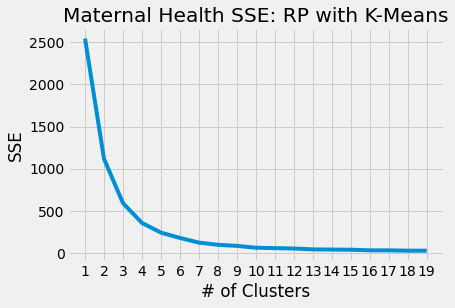

In [119]:
plt.plot(range(1, 20), sseMH_RP)
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Maternal Health SSE: RP with K-Means')
plt.show()

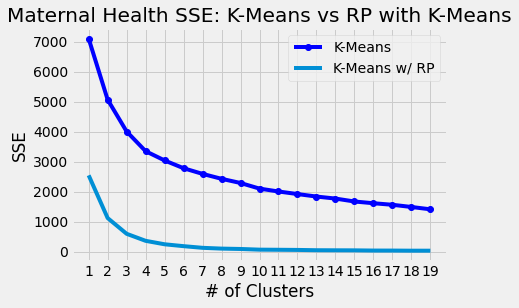

In [120]:
plt.plot(range(1, 20), sseMH, 'bo-', label = 'K-Means')
plt.plot(range(1, 20), sseMH_RP, label = 'K-Means w/ RP')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Maternal Health SSE: K-Means vs RP with K-Means')
plt.legend()
plt.show()

In [121]:
# A list holds the silhouette coefficients for each k
silhouette_coefficientsMH_RP = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansMH_RP = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_RP.fit(X_MH)
    score = silhouette_score(X_MH, kmeansMH_RP.labels_)
    silhouette_coefficientsMH_RP.append(score)

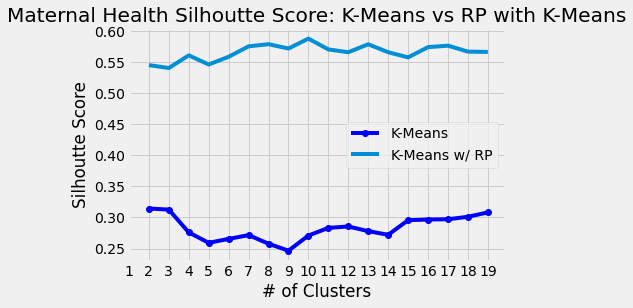

In [122]:
plt.plot(range(2, 20), silhouette_coefficientsMH, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silhouette_coefficientsMH_RP, label = 'K-Means w/ RP')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score: K-Means vs RP with K-Means')
plt.legend()
plt.show()

In [123]:
# Maternal health EM with RP

In [124]:
silMH_RP=[]
times=[]
for k in range(2, 20):
    start = time.time()
    gm_MH_RP = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_MH_RP.fit_predict(X_MH)
    end = time.time()
    times.append(end-start)
    silMH_RP.append(metrics.silhouette_score(X_MH, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.06603117783864339


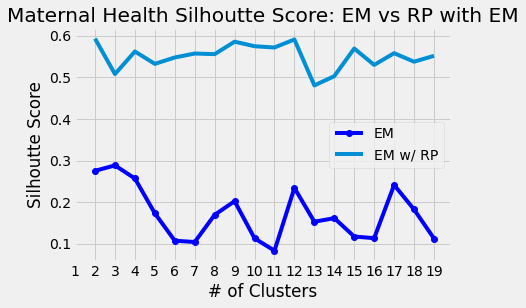

In [125]:
plt.plot(range(2, 20), silMH, 'bo-', label = 'EM')
plt.plot(range(2, 20), silMH_RP, label = 'EM w/ RP')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score: EM vs RP with EM')
plt.legend()
plt.show()

In [126]:
########### Select K best (KB) ###########
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [127]:
# Red wine KBest

In [128]:
start=time.time()
kBest = SelectKBest(k=1).fit_transform(redWine.drop(columns=['quality']), redWine.quality)
end=time.time()
print('Wall clock time: ', end-start)

Wall clock time:  0.008055686950683594


In [130]:
kBestRW = redWine[['alcohol', 'quality']]

In [131]:
# Red wine K-means with K-best

In [132]:
#SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# and https://realpython.com/k-means-clustering-python/
kmeansRW_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sseRW_KB = []
times=[]
for k in range(1, 20):
    start = time.time()
    kmeansRW_KB = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_KB.fit(kBestRW)
    end = time.time()
    times.append(end-start)
    sseRW_KB.append(kmeansRW_KB.inertia_)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.030879660656577664


In [133]:
kl = KneeLocator(
    range(1, 20), sseRW_KB, curve="convex", direction="decreasing"
)

kl.elbow

5

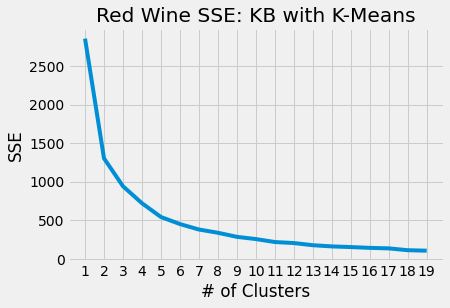

In [134]:
plt.plot(range(1, 20), sseRW_KB)
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Red Wine SSE: KB with K-Means')
# plt.legend()
plt.show()

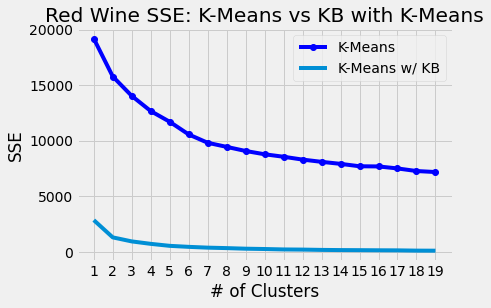

In [135]:
plt.plot(range(1, 20), sseRW, 'bo-', label = 'K-Means')
plt.plot(range(1, 20), sseRW_KB, label = 'K-Means w/ KB')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Red Wine SSE: K-Means vs KB with K-Means')
plt.legend()
plt.show()

In [136]:
# A list holds the silhouette coefficients for each k
silhouette_coefficientsRW_KB = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansRW_KB = KMeans(n_clusters=k, **kmeansRW_kwargs)
    kmeansRW_KB.fit(kBestRW)
    score = silhouette_score(kBestRW, kmeansRW_KB.labels_)
    silhouette_coefficientsRW_KB.append(score)

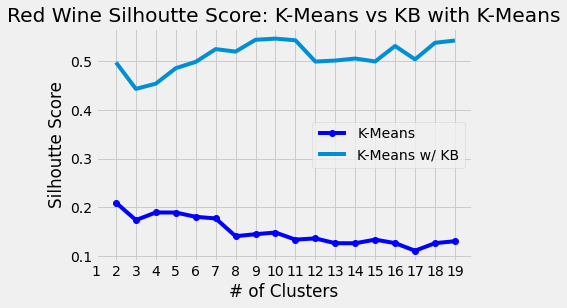

In [137]:
plt.plot(range(2, 20), silhouette_coefficientsRW, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silhouette_coefficientsRW_KB, label = 'K-Means w/ KB')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score: K-Means vs KB with K-Means')
plt.legend()
plt.show()

In [138]:
# Red wine EM with KB

In [139]:
silRW_KB=[]
times=[]
for k in range(2, 20):
    start = time.time()
    gm_RW_KB = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_RW_KB.fit_predict(kBestRW)
    end = time.time()
    times.append(end-start)
    silRW_KB.append(metrics.silhouette_score(kBestRW, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.10034073723687066


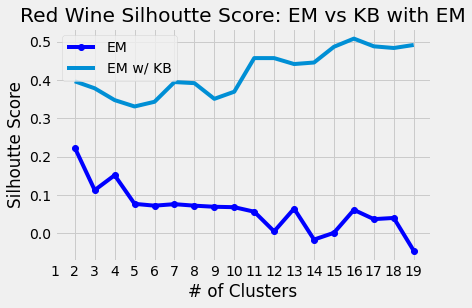

In [140]:
plt.plot(range(2, 20), silRW, 'bo-', label = 'EM')
plt.plot(range(2, 20), silRW_KB, label = 'EM w/ KB')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Red Wine Silhoutte Score: EM vs KB with EM')
plt.legend()
plt.show()

In [141]:
# Maternal health KB

In [142]:
start=time.time()
kBest = SelectKBest(k=1).fit_transform(maternalHealth.drop(columns=['RiskLevel','Risk']), maternalHealth.Risk)
end=time.time()
print('Wall clock time: ', end-start)

Wall clock time:  0.007244586944580078


In [143]:
kBest

array([[15.],
       [13.],
       [ 8.],
       ...,
       [19.],
       [18.],
       [ 6.]])

In [144]:
kBestMH = maternalHealth[['BS', 'Risk']]

In [145]:
# Maternal health k-means with k-best

In [146]:
#SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# and https://realpython.com/k-means-clustering-python/
kmeansMH_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sseMH_KB = []
times=[]
for k in range(1, 20):
    start = time.time()
    kmeansMH_KB = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_KB.fit(kBestMH)
    end = time.time()
    times.append(end-start)
    sseMH_KB.append(kmeansMH_KB.inertia_)
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.027911562668649775


In [147]:
kl = KneeLocator(
    range(1, 20), sseMH_KB, curve="convex", direction="decreasing"
)

kl.elbow

3

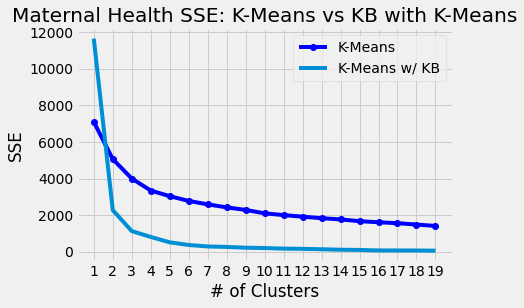

In [148]:
plt.plot(range(1, 20), sseMH, 'bo-', label = 'K-Means')
plt.plot(range(1, 20), sseMH_KB, label = 'K-Means w/ KB')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('SSE')
plt.title('Maternal Health SSE: K-Means vs KB with K-Means')
plt.legend()
plt.show()

In [149]:
# A list holds the silhouette coefficients for each k
silhouette_coefficientsMH_KB = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2,20):
    kmeansMH_KB = KMeans(n_clusters=k, **kmeansMH_kwargs)
    kmeansMH_KB.fit(kBestMH)
    score = silhouette_score(kBestMH, kmeansMH_KB.labels_)
    silhouette_coefficientsMH_KB.append(score)

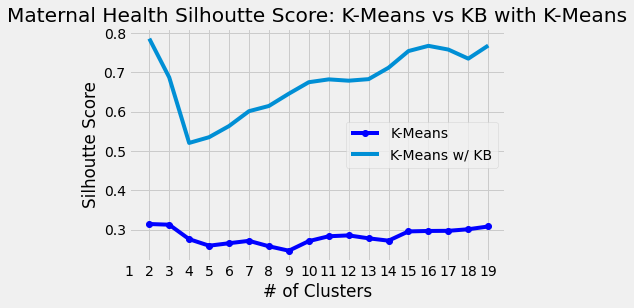

In [150]:
plt.plot(range(2, 20), silhouette_coefficientsMH, 'bo-', label = 'K-Means')
plt.plot(range(2, 20), silhouette_coefficientsMH_KB, label = 'K-Means w/ KB')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score: K-Means vs KB with K-Means')
plt.legend()
plt.show()

In [151]:
# Maternal health EM with KB

In [152]:
silMH_KB=[]
times=[]
for k in range(2, 20):
    start = time.time()
    gm_MH_KB = GaussianMixture(n_components=k, init_params='kmeans')
    labels = gm_MH_KB.fit_predict(kBestMH)
    end = time.time()
    times.append(end-start)
    silMH_KB.append(metrics.silhouette_score(kBestMH, labels, metric='euclidean'))
print('Wall clock time: ', statistics.mean(times))

Wall clock time:  0.10249793529510498


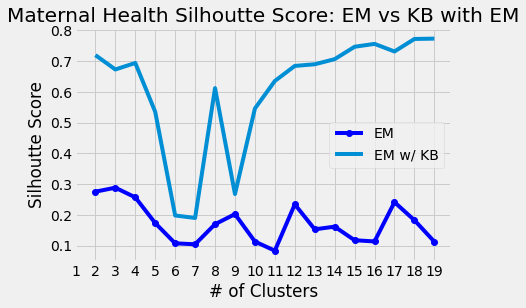

In [153]:
plt.plot(range(2, 20), silMH, 'bo-', label = 'EM')
plt.plot(range(2, 20), silMH_KB, label = 'EM w/ KB')
plt.xlabel('# of Clusters')
plt.xticks(range(1, 20))
plt.ylabel('Silhoutte Score')
plt.title('Maternal Health Silhoutte Score: EM vs KB with EM')
plt.legend()
plt.show()

In [154]:
########### NN with Dimensionality Reduction ###########
# Source: https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

In [155]:
# NN with PCA

In [156]:
xPCA = principalDfRW
yPCA = redWine['quality']

# Split data into training and test sets
trainX, testX, trainY, testY = train_test_split(xPCA, yPCA, test_size = 0.2)

# Normalize feature data
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [157]:
start = time.time()
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX_scaled, trainY)
end = time.time()

y_pred = mlp_clf.predict(testX_scaled)
y_train_pred = mlp_clf.predict(trainX_scaled)
y_train_accuracy = accuracy_score(trainY, y_train_pred)

# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
#cross-validation
cross_val_scores = cross_val_score(mlp_clf, xPCA, yPCA, cv=5)#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

print('Wall clock time: ', end-start)
print('Test Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Training accuracy: ', y_train_accuracy)
print('Validation accuracy: ', cross_val_scores.max())

[0.46875   0.490625  0.43125   0.4125    0.4169279]
0.490625
Wall clock time:  3.1059372425079346
Test Accuracy: 0.42
Training accuracy:  0.4691164972634871
Validation accuracy:  0.490625


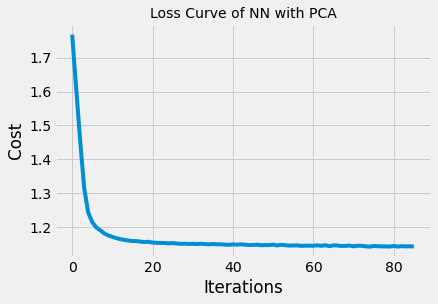

In [158]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve of NN with PCA", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

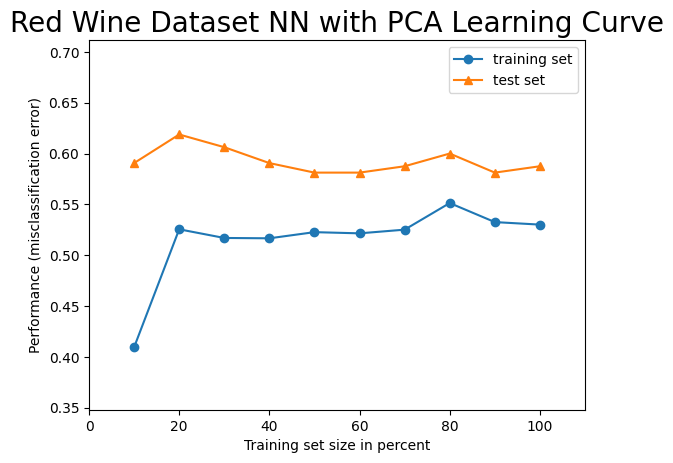

In [159]:
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(trainX, trainY, testX, testY, mlp_clf)
plt.title("Red Wine Dataset NN with PCA Learning Curve")
plt.show()

In [160]:
# ICA

In [161]:
df=pd.DataFrame(data=S_RW)
df = df.drop(df.columns[-1],axis=1)

x = df
y = redWine['quality']

# Split data into training and test sets
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

# Normalize feature data
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [162]:
start = time.time()
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX_scaled, trainY)
end = time.time()

y_pred = mlp_clf.predict(testX_scaled)
y_train_pred = mlp_clf.predict(trainX_scaled)
y_train_accuracy = accuracy_score(trainY, y_train_pred)

# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
#cross-validation
cross_val_scores = cross_val_score(mlp_clf, x, y, cv=5)#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

print('Wall clock time: ', end-start)
print('Test Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Training accuracy: ', y_train_accuracy)
print('Validation accuracy: ', cross_val_scores.max())

[0.68125    0.684375   0.81875    0.65625    0.72100313]
0.81875
Wall clock time:  7.2544965744018555
Test Accuracy: 0.79
Training accuracy:  1.0
Validation accuracy:  0.81875


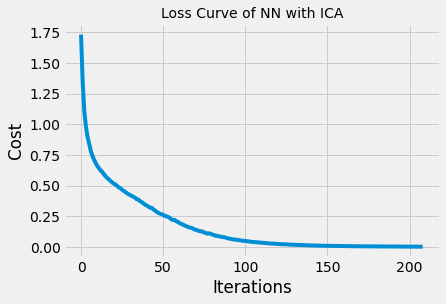

In [163]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve of NN with ICA", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

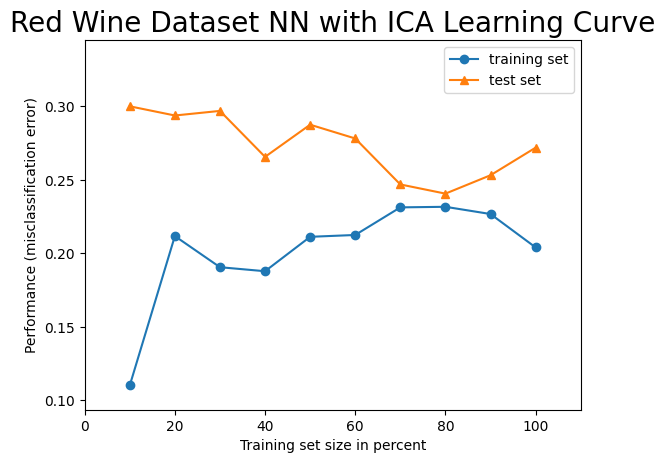

In [164]:
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(trainX, trainY, testX, testY, mlp_clf)
plt.title("Red Wine Dataset NN with ICA Learning Curve")
plt.show()

In [165]:
# RP

In [166]:
x = X_RW
y = redWine['quality']

# Split data into training and test sets
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

# Normalize feature data
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [167]:
start = time.time()
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX_scaled, trainY)
end = time.time()

y_pred = mlp_clf.predict(testX_scaled)
y_train_pred = mlp_clf.predict(trainX_scaled)
y_train_accuracy = accuracy_score(trainY, y_train_pred)

# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
#cross-validation
cross_val_scores = cross_val_score(mlp_clf, x, y, cv=5)#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

print('Wall clock time: ', end-start)
print('Test Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Training accuracy: ', y_train_accuracy)
print('Validation accuracy: ', cross_val_scores.max())

[0.459375   0.43125    0.521875   0.534375   0.44514107]
0.534375
Wall clock time:  2.377634286880493
Test Accuracy: 0.47
Training accuracy:  0.48866301798279904
Validation accuracy:  0.534375


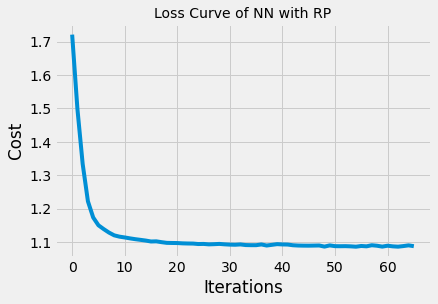

In [168]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve of NN with RP", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

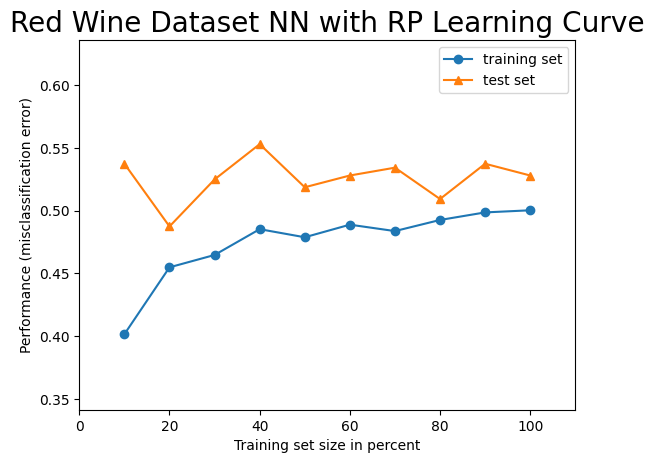

In [169]:
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(trainX, trainY, testX, testY, mlp_clf)
plt.title("Red Wine Dataset NN with RP Learning Curve")
plt.show()

In [170]:
# KB

In [171]:
x = kBestRW.drop(kBestRW.columns[-1],axis=1)
y = redWine['quality']

# Split data into training and test sets
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

# Normalize feature data
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [172]:
start = time.time()
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX_scaled, trainY)
end = time.time()

y_pred = mlp_clf.predict(testX_scaled)
y_train_pred = mlp_clf.predict(trainX_scaled)
y_train_accuracy = accuracy_score(trainY, y_train_pred)

# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
#cross-validation
cross_val_scores = cross_val_score(mlp_clf, x, y, cv=5)#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

print('Wall clock time: ', end-start)
print('Test Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Training accuracy: ', y_train_accuracy)
print('Validation accuracy: ', cross_val_scores.max())

[0.496875   0.503125   0.628125   0.54375    0.61128527]
0.628125
Wall clock time:  3.0159504413604736
Test Accuracy: 0.58
Training accuracy:  0.5535574667709148
Validation accuracy:  0.628125


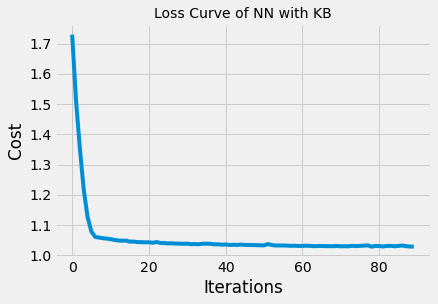

In [173]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve of NN with KB", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

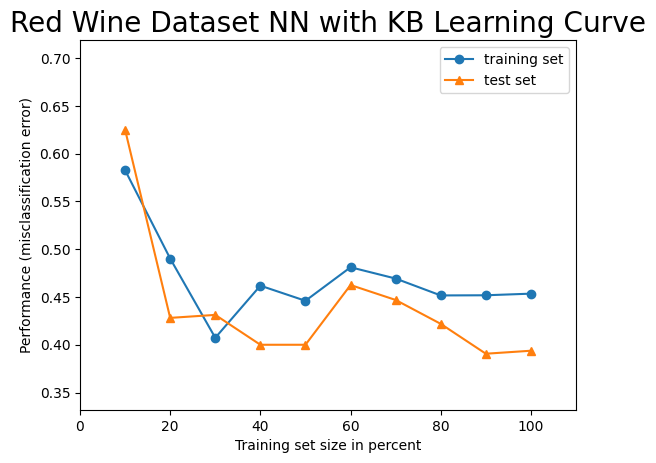

In [174]:
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(trainX, trainY, testX, testY, mlp_clf)
plt.title("Red Wine Dataset NN with KB Learning Curve")
plt.show()

In [175]:
########### NN with Clustering ###########

In [176]:
# K-Means

In [177]:
# using k=7 bc elbow is 7 in original clustering
#SOURCE: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# and https://realpython.com/k-means-clustering-python/
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

kmeans = KMeans(n_clusters=7, **kmeans_kwargs)
kmeans.fit(scaled_featuresRW)
print(kmeans.labels_)

[0 0 0 ... 6 6 4]


In [178]:
kmeansdf = redWine.copy()

In [179]:
kmeansdf['k-means'] = kmeans.labels_.tolist()

In [180]:
kmeansdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k-means
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,6
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,6


In [181]:
x = kmeansdf.drop(columns=['quality'])
y = kmeansdf['quality']

# Split data into training and test sets
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

# Normalize feature data
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [182]:
start = time.time()
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX_scaled, trainY)
end = time.time()

y_pred = mlp_clf.predict(testX_scaled)
y_train_pred = mlp_clf.predict(trainX_scaled)
y_train_accuracy = accuracy_score(trainY, y_train_pred)

# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
#cross-validation
cross_val_scores = cross_val_score(mlp_clf, x, y, cv=5)#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

print('Wall clock time: ', end-start)
print('Test Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Training accuracy: ', y_train_accuracy)
print('Validation accuracy: ', cross_val_scores.max())

[0.509375   0.5375     0.61875    0.521875   0.55172414]
0.61875
Wall clock time:  8.509954690933228
Test Accuracy: 0.67
Training accuracy:  0.9929632525410477
Validation accuracy:  0.61875


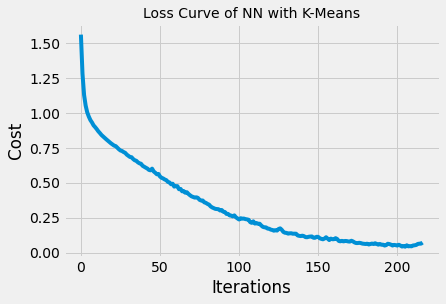

In [183]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve of NN with K-Means", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

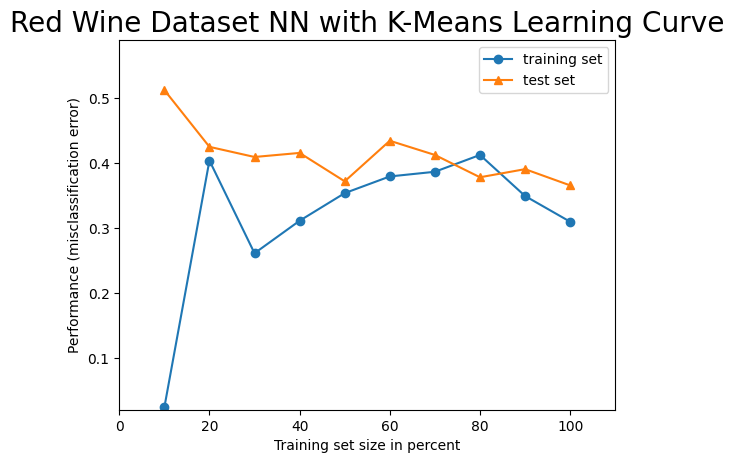

In [184]:
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(trainX, trainY, testX, testY, mlp_clf)
plt.title("Red Wine Dataset NN with K-Means Learning Curve")
plt.show()

In [185]:
# NN with EM

In [186]:
# using k=7 bc elbow is 7 in original clustering

gm = GaussianMixture(n_components=7, init_params='kmeans')
gm_labels = gm.fit_predict(scaled_featuresRW)


In [187]:
gm_labels

array([1, 6, 6, ..., 0, 0, 3])

In [188]:
gmdf = redWine.copy()

In [189]:
gmdf['EM'] = gm_labels.tolist()

In [190]:
gmdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,EM
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,6
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,6
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [191]:
x = gmdf.drop(columns=['quality'])
y = gmdf['quality']

# Split data into training and test sets
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

# Normalize feature data
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [192]:
start = time.time()
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')
mlp_clf.fit(trainX_scaled, trainY)
end = time.time()

y_pred = mlp_clf.predict(testX_scaled)
y_train_pred = mlp_clf.predict(trainX_scaled)
y_train_accuracy = accuracy_score(trainY, y_train_pred)

# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
#cross-validation
cross_val_scores = cross_val_score(mlp_clf, x, y, cv=5)#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

print('Wall clock time: ', end-start)
print('Test Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Training accuracy: ', y_train_accuracy)
print('Validation accuracy: ', cross_val_scores.max())

[0.5625     0.515625   0.56875    0.534375   0.53605016]
0.56875
Wall clock time:  11.737110376358032
Test Accuracy: 0.63
Training accuracy:  0.9867083659108679
Validation accuracy:  0.56875


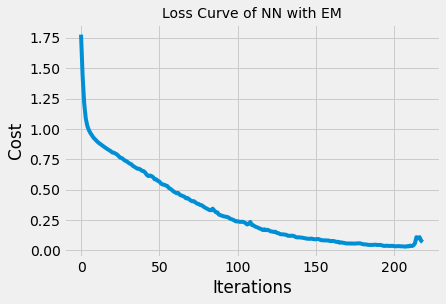

In [193]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve of NN with EM", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

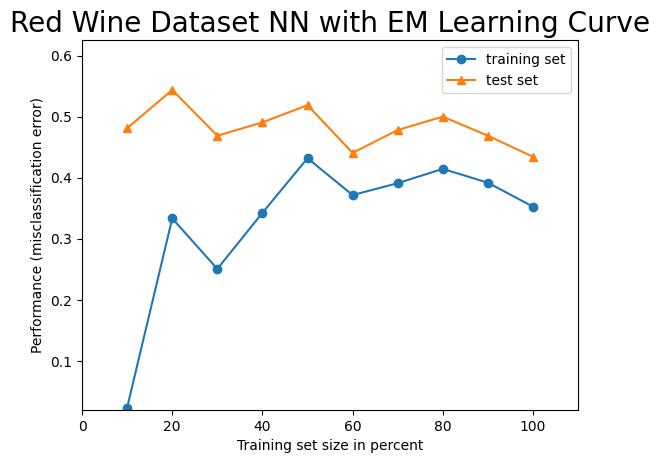

In [194]:
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(trainX, trainY, testX, testY, mlp_clf)
plt.title("Red Wine Dataset NN with EM Learning Curve")
plt.show()

In [195]:
################ END OF NOTEBOOK ################ 